In [1]:
import pyvips
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from pathlib import Path
import pandas as pd
import cv2

from src.tools import *
# load the full-resolution image

In [2]:
data_path = Path('/home/sheh/datasets/TissueNet')
train_annot = pd.read_csv(data_path / 'train_annotations.csv')

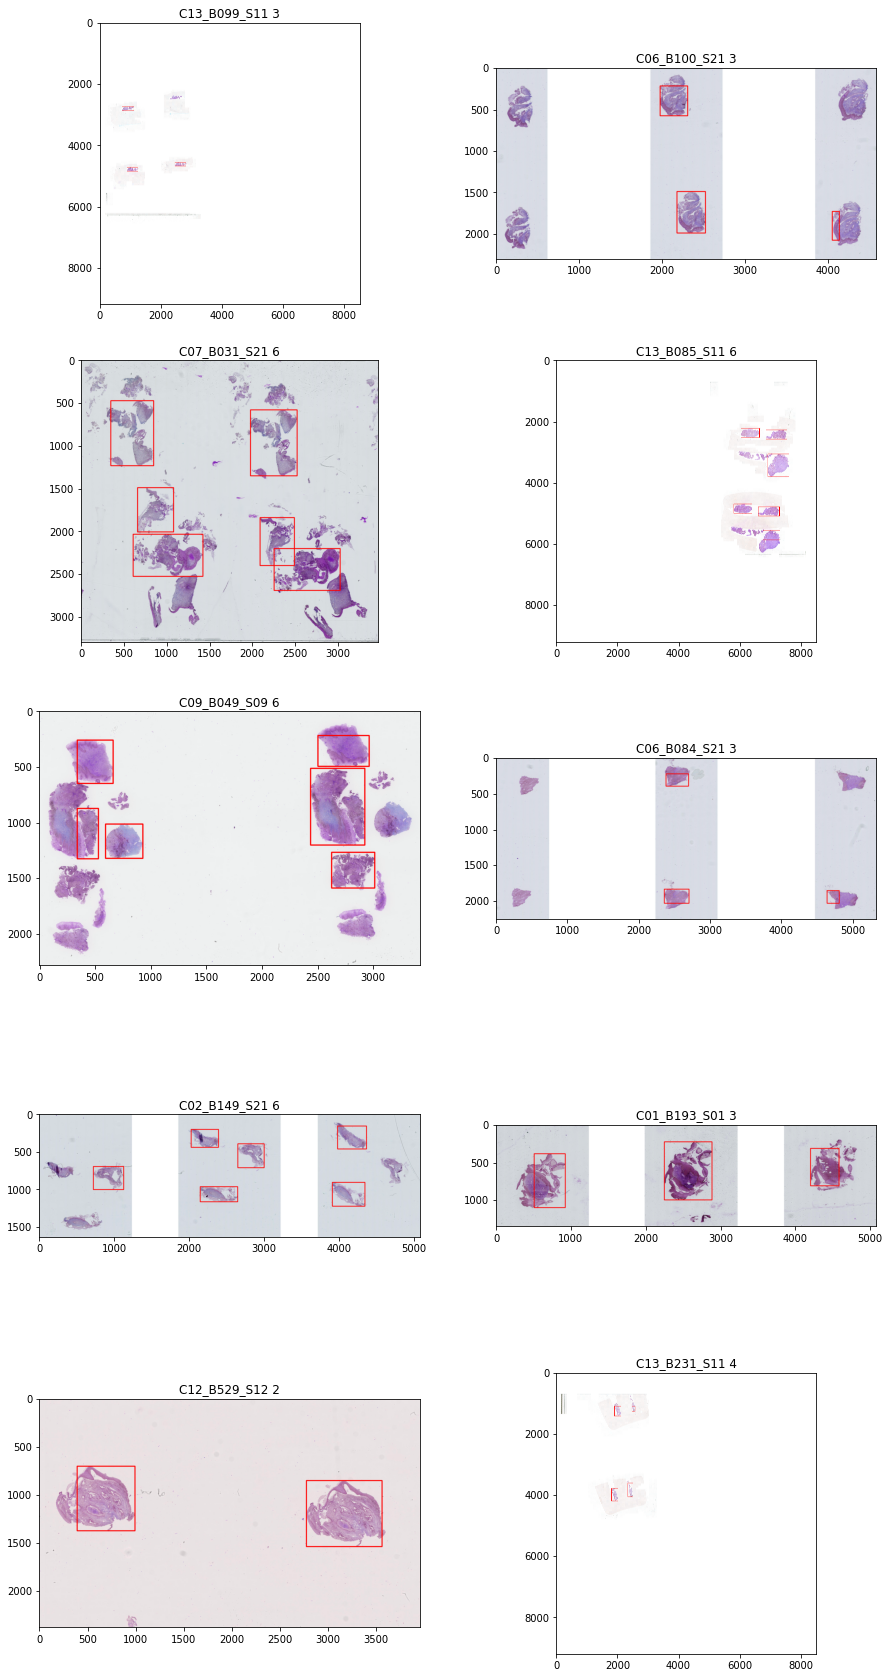

In [3]:
row_n = 5
cols_n = 2
sample_n = row_n * cols_n

fig, ax = plt.subplots(row_n, cols_n, figsize=(15, 30))

for i in range(sample_n):
    #slide_file = Path(train_annot. filename.unique()[i]).stem
    slide_file = Path(np.random.choice(train_annot.filename.unique(), 1)[0]).stem
    img = cv2.imread(str(data_path / "downsampled_images" / f"{slide_file}.jpg"))
    assert img is not None
    bbs = tissue_loc(img)

    for bb in bbs:
        #ax[i].imshow(img[bb[1]:bb[1]+bb[3], bb[0]:bb[0]+bb[2]])
        cv2.rectangle(img, (bb[0], bb[1]), (bb[2], bb[3]), (255, 0, 0), 10)
    ax[i//cols_n, i%cols_n].set_title(f"{slide_file} {len(bbs)}")
    ax[i//cols_n, i%cols_n].imshow(img)


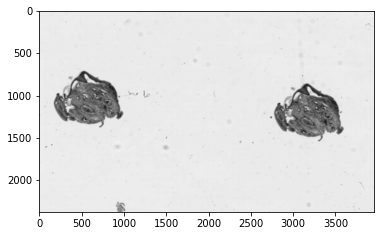

In [70]:
import cv2
from src.tools import tissue_loc
img = cv2.imread(str(data_path / "downsampled_images" / f"C12_B529_S12.jpg"))
#plt.imshow(img)
#tissue_loc(img, show=True)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray = 255 - gray
gray = cv2.GaussianBlur(gray, (25, 25), 0)
plt.imshow(gray, cmap='gray')

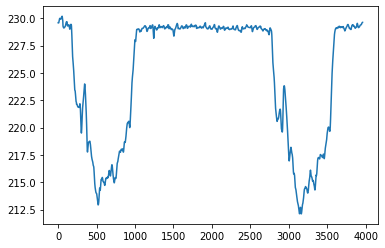

In [71]:
gray_sum = gray.mean(axis=0)
plt.plot(range(len(gray_sum)), gray_sum)

In [73]:
np.bincount(gray.ravel()).argmax()

229

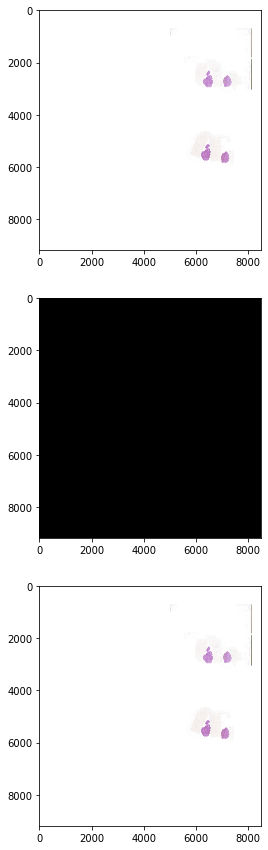

In [69]:
thresh = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY_INV)[1]
img_copy = img.copy()
img_copy[thresh == 255] = 255

fig, axes = plt.subplots(3, 1, figsize=(15, 15))
axes[0].imshow(img)
axes[1].imshow(thresh, cmap='gray')
axes[2].imshow(img_copy)
#img[np.argwhere(thresh == 255)]
#thresh.shape

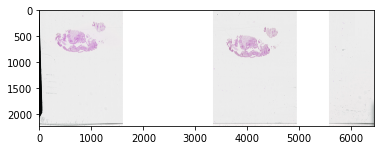

In [10]:
curr_seq_start = None
gray_sum = gray.mean(axis=0)

cols_to_remove = []
for i in range(gray_sum.shape[0]):
    if gray_sum[i] >= 220 and curr_seq_start is None:
        curr_seq_start = i
    elif gray_sum[i] < 220 and curr_seq_start is not None:
        if (i - curr_seq_start) >= 0.1*gray_sum.shape[0]:
            cols_to_remove.extend(list(range(curr_seq_start, i)))
        curr_seq_start = None
        
img_ret = img.copy()
img_ret = np.delete(img_ret, cols_to_remove, axis=1)
plt.imshow(img_ret)

In [5]:
y1, x1 = np.argwhere(gray != 255).min(axis=0)
y2, x2 = np.argwhere(gray != 255).max(axis=0)
plt.imshow(gray[y1:y2,x1:x2], cmap='gray')

NameError: name 'gray' is not defined

In [6]:
C14_B113_S11

NameError: name 'C14_B113_S11' is not defined

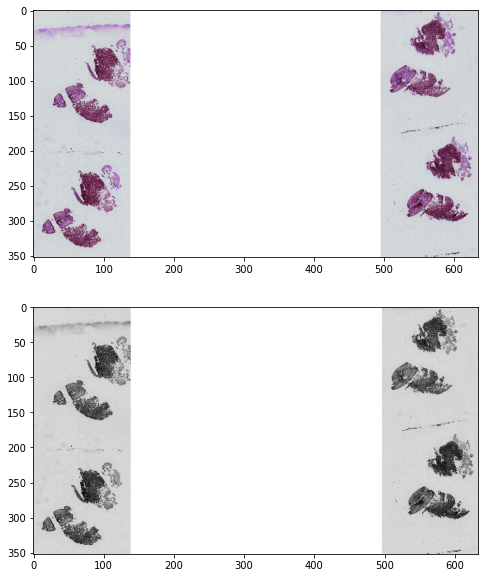

In [6]:
slide_file = ['C01_B189_S01']
#slide_file = train_annot.filename.unique()

image_name = slide_file[0].split(".")[0]

img = cv2.imread(str(data_path / "downsampled_images" / f"{image_name}.jpg"))
img = cv2.resize(img, (img.shape[1]//8, img.shape[0]//8))

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
y1_w, x1_w = np.argwhere(gray != 255).min(axis=0)
y2_w, x2_w = np.argwhere(gray != 255).max(axis=0)
gray = gray[y1_w:y2_w, x1_w:x2_w]

fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].imshow(img)
#gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
ax[1].imshow(gray, cmap='gray')

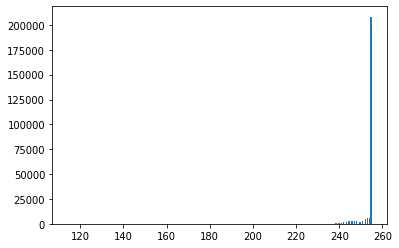

In [23]:
_ = plt.hist(gray.ravel(), bins=256)

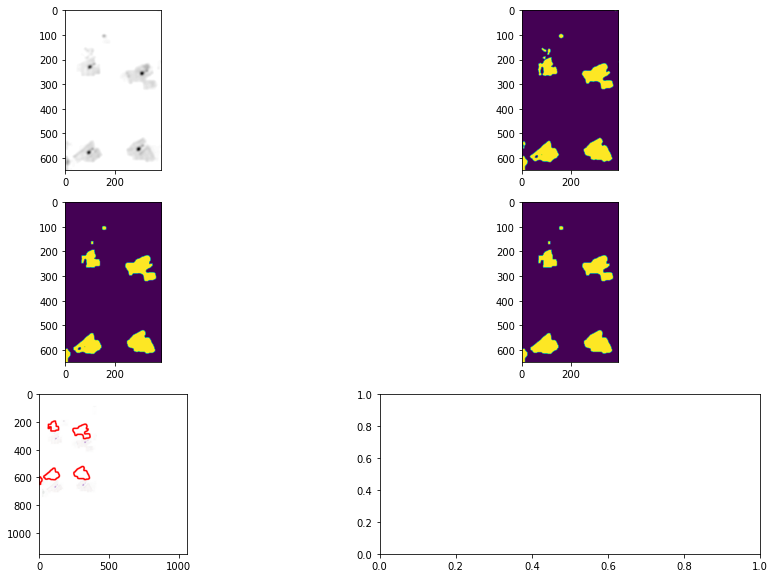

In [24]:
max_locs = 6

height, width = img.shape[:2]
blur = cv2.GaussianBlur(gray, (25, 25), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

noise_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, noise_kernel, iterations=2)
close_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
close = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, close_kernel, iterations=2)

contours, _ = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

area_contours = sorted([(cv2.contourArea(cnt), cnt) for cnt in contours],
                       key=lambda x: x[0], reverse=True)

contours = map(lambda x: x[1],
               filter(lambda x: x[0] / area_contours[0][0] > 0.1, area_contours)
               )
contours = list(contours)
contours = contours[:max_locs]

cv2.drawContours(img, contours, -1, color=(255, 0, 0), thickness=10)

fig, ax = plt.subplots(3, 2, figsize=(15, 10))
ax[0,0].imshow(blur, cmap='gray')
ax[0,1].imshow(thresh)
ax[1,0].imshow(opening)
ax[1,1].imshow(close)
ax[2,0].imshow(img)

In [ ]:
contours[0].shape

In [ ]:
h = plt.hist(gray.ravel(), 256)

In [ ]:
h = plt.hist(blur.ravel(), 256)

In [ ]:
noise_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, noise_kernel, iterations=2)
close_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (14,14))
close = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, close_kernel, iterations=3)
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(opening, cmap='gray')
ax[1].imshow(close, cmap='gray')

In [ ]:
draw = img.copy()
contours, _ = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

area_contours = sorted([(cv2.contourArea(cnt), cnt) for cnt in contours], 
                       key=lambda x: x[0], reverse=True)

contours = map(lambda x: x[1], 
               filter(lambda x: x[0]/area_contours[0][0] > 0.1, area_contours)
              )
contours = list(contours)
cv2.drawContours(draw, contours, -1, (0,255,0), 3)

max_contours = 6
contours = contours[:max_contours]
rects = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(draw,(x,y),(x+w,y+h),(255,0,0),5)
    if 1/10 < w/h < 10/1:
        rects.append([x,y,x+w,y+h])
# x,y,w,h = cv2.boundingRect(coords)
# cv2.rectangle(img, (x, y), (x + w, y + h), (255,0,0), 10)
# crop = img[y:y+h, x:x+w]
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(draw)
#ax[1].imshow(crop, cmap='gray')
fig, axes = plt.subplots(round(len(rects)/2), 2)
for i in range(len(rects)):
    roi = img[rects[i][1]:rects[i][3], rects[i][0]:rects[i][2]]
    axes[i//2, i%2].imshow(roi)